In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import os
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
#Matplotlib defaults
plt.rcParams.update({'font.size': 22})
plt.style.use("dark_background")

# Correlate preferential attachemnt (influence) over author/assignee patents

Using significant amounts of code from patent_MA_analysis.ipynb

## Step 1: link patents with 2015-2019 preferential attachment values

Using 2015-2019 to have a 1-to-1 comparison, as well as use modern influence to judge patents

In [10]:
results_df = pd.read_csv("Data/Patents/patent_MA_results.csv")

print(results_df.head())

   Unnamed: 0                ID         author    assignees
0           0  US-2016000413-A1  A AMAR OUSAMA  UNIV_BOSTON
1           3  US-2016000413-A1   BIGIO IRVING  UNIV_BOSTON
2           6  US-2016000413-A1  BRIGGS JOHN C  UNIV_BOSTON
3           9  US-2016000413-A1  CHARGIN DAVID  UNIV_BOSTON
4          12  US-2016000413-A1  LEE STEPHANIE  UNIV_BOSTON


In [3]:
patent_cpd_links = pickle.load(file=open("Data/Patents/patent_cpd_links.p", "rb"))

In [7]:
cpd_attachment_links = pickle.load(file=open("/Volumes/Macintosh HD 4/SureChemBL/Attachment_noNetworks/pref_attach_2015_2019.p", "rb"))

In [5]:
def get_attachment_values(ids, cpd_attachment_links):
    """ Given a list of surechembl cpd ids, return a list of MA values associated with those ids

    Args:
        ids (list): list of all cpd ids
        cpd_MA_links (dict): id:MA dictionary

    Returns:
        list: list of all corresponding MA values
    """
    attachments = []
    for id in ids:
        try:
            attachments.append(cpd_attachment_links[id])
        except KeyError:
            pass

    return attachments

In [8]:
patent_MA_links = {}

for patent, ids in tqdm(patent_cpd_links.items()):
    patent_MA_links[patent] = get_attachment_values(ids, cpd_attachment_links)

100%|██████████| 41940/41940 [00:03<00:00, 11366.68it/s]


In [9]:
print(list(patent_MA_links.items())[0:5])

[('WO-2013069771-A1', [199.5084745762712]), ('US-5326574-A', [2526.830508474576, 2526.830508474576, 905.0169491525423, 46.49152542372882, 332.1864406779661, 1072.7118644067796, 907.8813559322034, 442.1864406779661, 0.03389830508474576, 3.5084745762711864, 7.627118644067797, 7.627118644067797, 7.627118644067797, 7.627118644067797, 541.4915254237288, 0.03389830508474576, 1830.864406779661, 425.9491525423729, 17.610169491525422, 17.610169491525422, 17.610169491525422, 17.610169491525422, 2487.576271186441, 2487.576271186441, 197.79661016949152, 14.779661016949152, 14.779661016949152, 14.779661016949152, 14.779661016949152, 885.4067796610169, 364.5762711864407, 0.05084745762711865, 871.8983050847457, 366.7457627118644, 1084.4745762711864, 443.7118644067797, 324.20338983050846, 426.3220338983051, 13.135593220338983, 908.4915254237288]), ('US-7687629-B2', [0.22033898305084745, 0.01694915254237288, 547.2372881355932, 0.1864406779661017, 338.4406779661017, 0.11864406779661017, 591.983050847457

In [ ]:
results_df["attachments"] = results_df["ID"].map(patent_MA_links)

In [12]:
print(results_df)

        Unnamed: 0                ID                author          assignees  \
0                0  US-2016000413-A1         A AMAR OUSAMA        UNIV_BOSTON   
1                3  US-2016000413-A1          BIGIO IRVING        UNIV_BOSTON   
2                6  US-2016000413-A1         BRIGGS JOHN C        UNIV_BOSTON   
3                9  US-2016000413-A1         CHARGIN DAVID        UNIV_BOSTON   
4               12  US-2016000413-A1         LEE STEPHANIE        UNIV_BOSTON   
...            ...               ...                   ...                ...   
373735      907679      US-5361239-A     ZOELLER WILLIAM A   BAKER_HUGHES_INC   
373736      907680  US-2021354847-A1        ZWEIG ANDREW M          BOEING_CO   
373737      907681     US-9751966-B2        ZWEIG ANDREW M          BOEING_CO   
373738      907682      US-4914171-A        ZWEIG ANDREW M  ALLIED_SIGNAL_INC   
373739      907683  US-2021009819-A1  ZWEIG ANDREW MICHAEL          BOEING_CO   

                           

In [13]:
testing_df = results_df[results_df["ID"].isin(["US-9751966-B2", "US-4914171-A"])]
print(testing_df)

        Unnamed: 0             ID          author          assignees  \
373737      907681  US-9751966-B2  ZWEIG ANDREW M          BOEING_CO   
373738      907682   US-4914171-A  ZWEIG ANDREW M  ALLIED_SIGNAL_INC   

                                              attachments  
373737  [0.01694915254237288, 0.11864406779661017, 0.1...  
373738  [5.966101694915254, 71.54237288135593, 0.20338...  


In [14]:
## Add avg MA to results_df
attachment_avgs = results_df.explode("attachments").groupby("ID").attachments.apply(np.mean)
attachment_avgs = dict(attachment_avgs)

results_df["attachment_avg"] = results_df["ID"].map(attachment_avgs)
print(results_df)

        Unnamed: 0                ID                author          assignees  \
0                0  US-2016000413-A1         A AMAR OUSAMA        UNIV_BOSTON   
1                3  US-2016000413-A1          BIGIO IRVING        UNIV_BOSTON   
2                6  US-2016000413-A1         BRIGGS JOHN C        UNIV_BOSTON   
3                9  US-2016000413-A1         CHARGIN DAVID        UNIV_BOSTON   
4               12  US-2016000413-A1         LEE STEPHANIE        UNIV_BOSTON   
...            ...               ...                   ...                ...   
373735      907679      US-5361239-A     ZOELLER WILLIAM A   BAKER_HUGHES_INC   
373736      907680  US-2021354847-A1        ZWEIG ANDREW M          BOEING_CO   
373737      907681     US-9751966-B2        ZWEIG ANDREW M          BOEING_CO   
373738      907682      US-4914171-A        ZWEIG ANDREW M  ALLIED_SIGNAL_INC   
373739      907683  US-2021009819-A1  ZWEIG ANDREW MICHAEL          BOEING_CO   

                           

In [15]:
results_df.to_csv("Data/Patents/patent_attachment_results.csv")

In [16]:
#Drop all NaNs
results_df = results_df.dropna()
print(results_df)

        Unnamed: 0              ID            author  \
87             276  US-10034442-B2  AARDEN HARRIETTE   
88             277  US-10034442-B2           BAR AMI   
89             278  US-10034442-B2       GRIT ALBERT   
90             279  US-10034442-B2       HOTZEV AMIT   
91             280  US-10034442-B2        OSRI ARNON   
...            ...             ...               ...   
373732      907673  US-10619065-B2    ZHOU ZHANG-LIN   
373733      907675  US-10619030-B2    ZHOU ZHANG-LIN   
373734      907677   US-7384990-B2    ZHOU ZHANG-LIN   
373737      907681   US-9751966-B2    ZWEIG ANDREW M   
373738      907682    US-4914171-A    ZWEIG ANDREW M   

                             assignees  \
87         SEMINIS_VEGETABLE_SEEDS_INC   
88         SEMINIS_VEGETABLE_SEEDS_INC   
89         SEMINIS_VEGETABLE_SEEDS_INC   
90         SEMINIS_VEGETABLE_SEEDS_INC   
91         SEMINIS_VEGETABLE_SEEDS_INC   
...                                ...   
373732  HEWLETT_PACKARD_DEVELOPME

### Add dates

In [17]:
full_patent_dates = pickle.load(file=open("/Volumes/Macintosh HD 4/SureChemBL/CpdPatentIdsDates/Patent_Date_Dict/patent_date_dict_FULL.p", "rb"))

In [19]:
def get_date_fromDict(ID, full_patent_dates):
    return full_patent_dates[ID]

In [20]:
### Add dates to results dataframe
tqdm.pandas()

results_df["date"] = results_df["ID"].progress_apply(get_date_fromDict, args=(full_patent_dates, ))

100%|██████████| 186521/186521 [00:00<00:00, 372853.36it/s]


In [22]:
results_df["date"] = pd.to_datetime(results_df["date"])
results_df["date_ordinal"] = results_df["date"].map(dt.datetime.toordinal)
print(results_df)

        Unnamed: 0              ID            author  \
87             276  US-10034442-B2  AARDEN HARRIETTE   
88             277  US-10034442-B2           BAR AMI   
89             278  US-10034442-B2       GRIT ALBERT   
90             279  US-10034442-B2       HOTZEV AMIT   
91             280  US-10034442-B2        OSRI ARNON   
...            ...             ...               ...   
373732      907673  US-10619065-B2    ZHOU ZHANG-LIN   
373733      907675  US-10619030-B2    ZHOU ZHANG-LIN   
373734      907677   US-7384990-B2    ZHOU ZHANG-LIN   
373737      907681   US-9751966-B2    ZWEIG ANDREW M   
373738      907682    US-4914171-A    ZWEIG ANDREW M   

                             assignees  \
87         SEMINIS_VEGETABLE_SEEDS_INC   
88         SEMINIS_VEGETABLE_SEEDS_INC   
89         SEMINIS_VEGETABLE_SEEDS_INC   
90         SEMINIS_VEGETABLE_SEEDS_INC   
91         SEMINIS_VEGETABLE_SEEDS_INC   
...                                ...   
373732  HEWLETT_PACKARD_DEVELOPME

## Delta-MA over time, by company first

Start with testing on same company as patent_MA_analysis

In [25]:
## Testing - start with a single company, get process down, then expand
sub_df = results_df[results_df["assignees"] == "EXELIXIS_INC"]

date_attachment = dict(zip(sub_df.date, sub_df.attachment_avg))
print(date_attachment)

{Timestamp('2013-05-14 00:00:00'): 207.37990116843133, Timestamp('2011-09-06 00:00:00'): 270.30314400310505, Timestamp('2014-01-28 00:00:00'): 222.34692050608703, Timestamp('2012-12-04 00:00:00'): 395.33758229444004, Timestamp('2012-08-14 00:00:00'): 333.88884794890714, Timestamp('2010-05-26 00:00:00'): 760.0096852300246, Timestamp('2011-12-13 00:00:00'): 79.12363335075962, Timestamp('2010-04-27 00:00:00'): 300.947427775386, Timestamp('2014-02-11 00:00:00'): 137.85208012326743, Timestamp('2014-04-15 00:00:00'): 104.82972275228116, Timestamp('2011-01-18 00:00:00'): 406.42913811756245, Timestamp('2014-02-04 00:00:00'): 86.30127594743841, Timestamp('2013-07-16 00:00:00'): 54.5333998005984, Timestamp('2011-10-25 00:00:00'): 98.07562550443104, Timestamp('2014-11-18 00:00:00'): 29.165289320626187, Timestamp('2020-07-30 00:00:00'): 495.13453389830596, Timestamp('2011-07-12 00:00:00'): 255.69133775145195, Timestamp('2020-12-10 00:00:00'): 205.8212464376778, Timestamp('2018-07-31 00:00:00'): 13

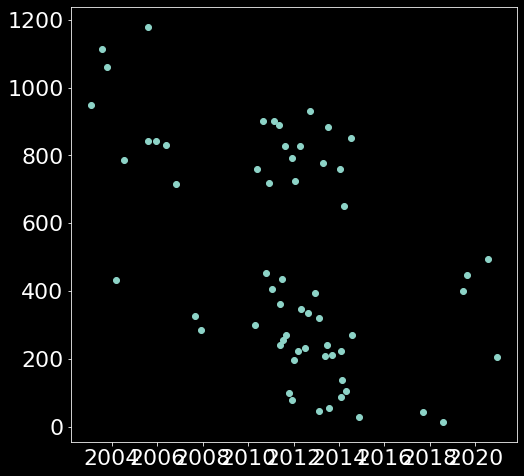

In [26]:
plt.figure(figsize=(8,8))

plt.scatter(date_attachment.keys(), date_attachment.values())

In [32]:
## Use sklearn to build linear regression model
linear_regressor = LinearRegression()
X = sub_df["date_ordinal"].values.reshape(-1,1)
Y = sub_df["attachment_avg"].values.reshape(-1,1)
reg = linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

## Use statsmodels to find pvalue
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
coef = est2.summary2().tables[1]["Coef."]["x1"]
pvalue = est2.summary2().tables[1]["P>|t|"]["x1"]
r2 = list(est2.summary2().tables[0][1])[-1]
print(est2.summary())
print("Slope:", coef)
print("pvalue:", pvalue)
print("r2:", r2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     307.4
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           2.68e-56
Time:                        12:00:21   Log-Likelihood:                -4359.0
No. Observations:                 629   AIC:                             8722.
Df Residuals:                     627   BIC:                             8731.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.084e+05   6161.259     17.595      0.0

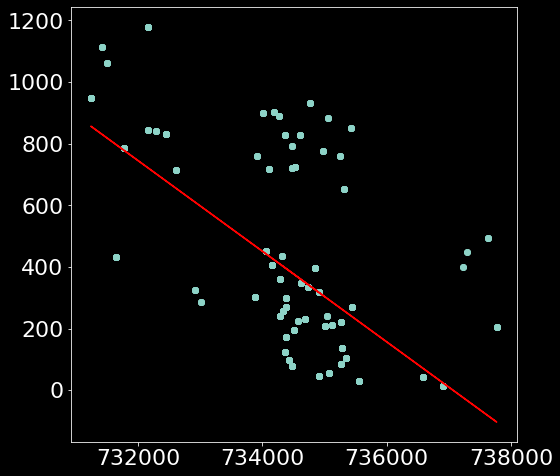

In [33]:
plt.figure(figsize=(8,8))

plt.scatter(X, Y)
plt.plot(X, Y_pred, color="red")

### Full attachment analysis

100%|██████████| 833/833 [00:16<00:00, 51.14it/s]


Text(0, 0.5, 'Average Preferential Attachment')

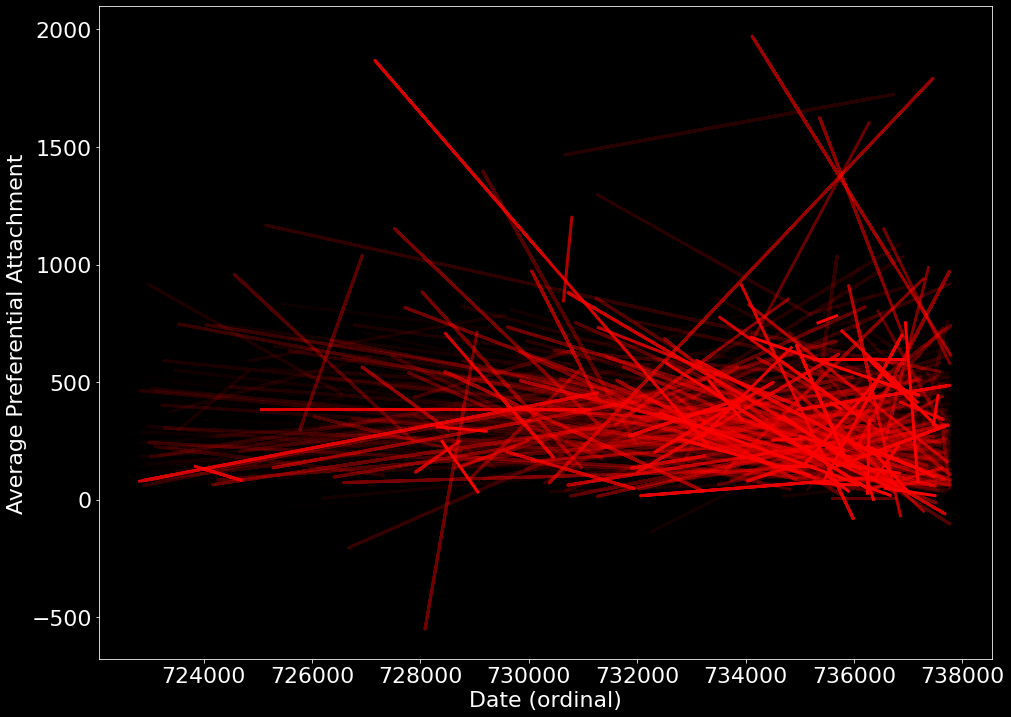

In [34]:
plt.figure(figsize=(16,12))

linear_regressor = LinearRegression()

assignee_sizes = []
assignee_rsqs = []
assignee_deltaMAs = []
assignee_slopes = []

for assignee in tqdm(list(results_df["assignees"].unique())):
    sub_df = results_df[results_df["assignees"] == assignee]
    assignee_sizes.append(len(sub_df))

    if len(sub_df) > 8:
    
        X = sub_df["date_ordinal"].values.reshape(-1,1)
        Y = sub_df["attachment_avg"].values.reshape(-1,1)
        try:
            reg = linear_regressor.fit(X, Y)
            Y_pred = linear_regressor.predict(X)

            #Store slope
            assignee_slopes.append(reg.coef_[0][0])

            #Calculate deltaMA (change in MA of linear regression)
            assignee_deltaMAs.append(max(Y_pred)[0] - min(Y_pred)[0])

            #Find r2, use that as alpha (just as a test)
            X2 = sm.add_constant(X)
            est = sm.OLS(Y, X2)
            est2 = est.fit()
            
            r2 = reg.score(X, Y)
            assignee_rsqs.append(r2)

            plt.plot(X, Y_pred, linewidth=3, alpha=float(r2), color="red")
        except ValueError as e:
            pass



# plt.legend()
plt.xlabel("Date (ordinal)")
plt.ylabel("Average Preferential Attachment")

100%|██████████| 71621/71621 [23:42<00:00, 50.35it/s] 


Text(0, 0.5, 'MA')

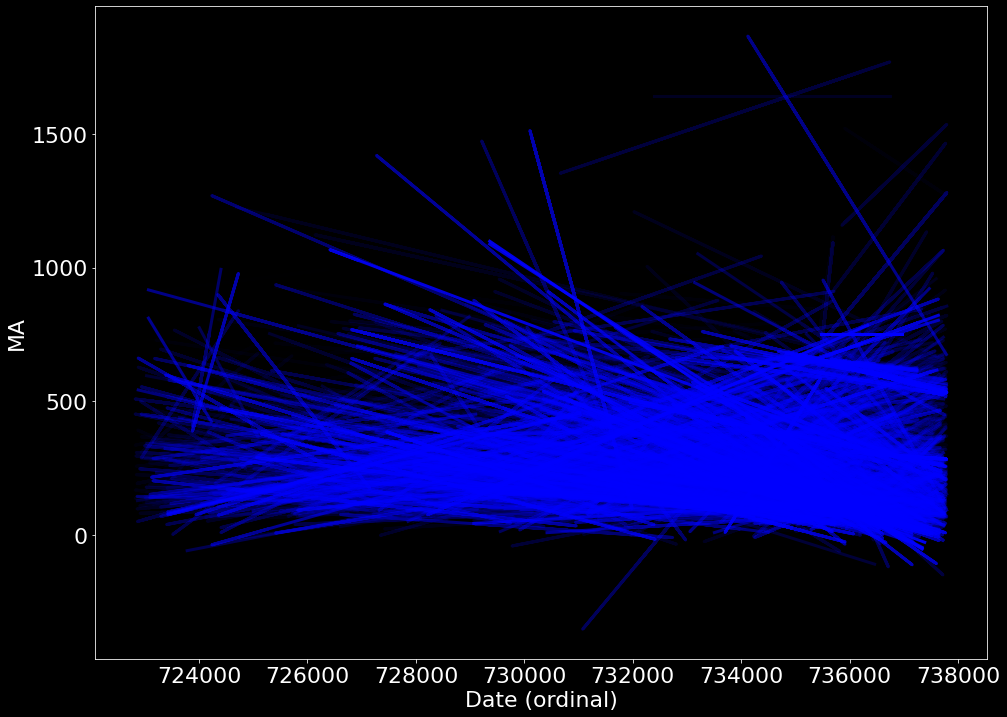

In [42]:
plt.figure(figsize=(16,12))

linear_regressor = LinearRegression()



author_sizes = []
author_rsqs = []
author_deltaMAs = []
author_slopes = []


for author in tqdm(list(results_df["author"].unique())):
    sub_df = results_df[results_df["author"] == author]
    author_sizes.append(len(sub_df))
    if len(sub_df) > 10:
    
        X = sub_df["date_ordinal"].values.reshape(-1,1)
        Y = sub_df["attachment_avg"].values.reshape(-1,1)
        try:
            reg = linear_regressor.fit(X, Y)
            Y_pred = linear_regressor.predict(X)

            #Store slope
            author_slopes.append(reg.coef_[0][0])

            #Calculate deltaMA (change in MA of linear regression)
            author_deltaMAs.append(max(Y_pred)[0] - min(Y_pred)[0])

            # #Find r2, use that as alpha (just as a test)
            # X2 = sm.add_constant(X)
            # est = sm.OLS(Y, X2)
            # est2 = est.fit()
            
            # r2 = list(est2.summary2().tables[0][1])[-1]
            r2 = reg.score(X, Y)
            
            author_rsqs.append(r2)

            plt.plot(X, Y_pred, linewidth=3, alpha=float(r2), color="blue")
        except ValueError as e:
            pass

# plt.legend()
plt.xlabel("Date (ordinal)")
plt.ylabel("Preferential Attachment")

# plt.savefig("assignee_author_linear_regressions.png", format="png")


Text(0, 0.5, 'Linear Correlation Slope')

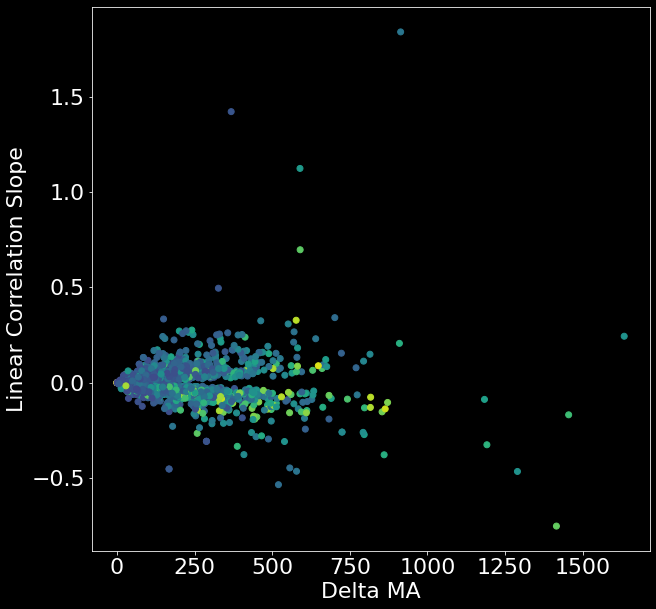

In [43]:
## Plot deltaMA / slope correlation (does deltaMA correspond with the slope at all? This is the big one...)

#Authors first
plt.figure(figsize=(10,10))

plt.scatter(author_deltaMAs, author_slopes, c=author_rsqs, cmap="viridis")

plt.xlabel("Delta MA")
plt.ylabel("Linear Correlation Slope")

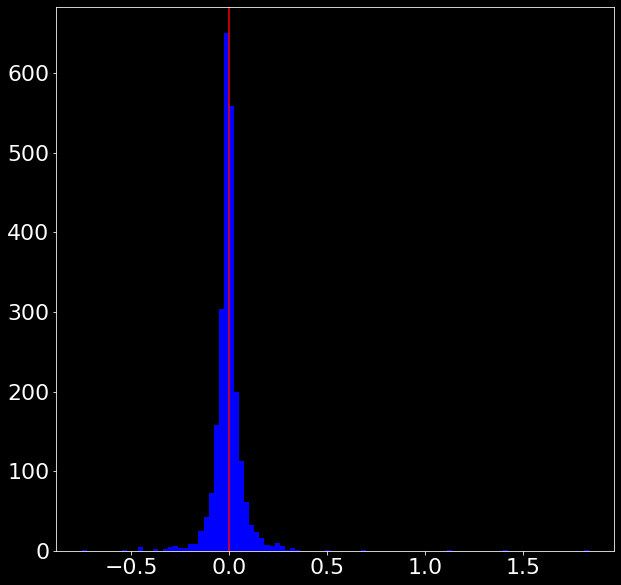

In [44]:
plt.figure(figsize=(10,10))

#Histogram of the number of various slopes
plt.hist(author_slopes, color="blue", bins=100)

plt.axvline(0, color="red")

plt.show()

Text(0, 0.5, 'Linear Correlation Slope')

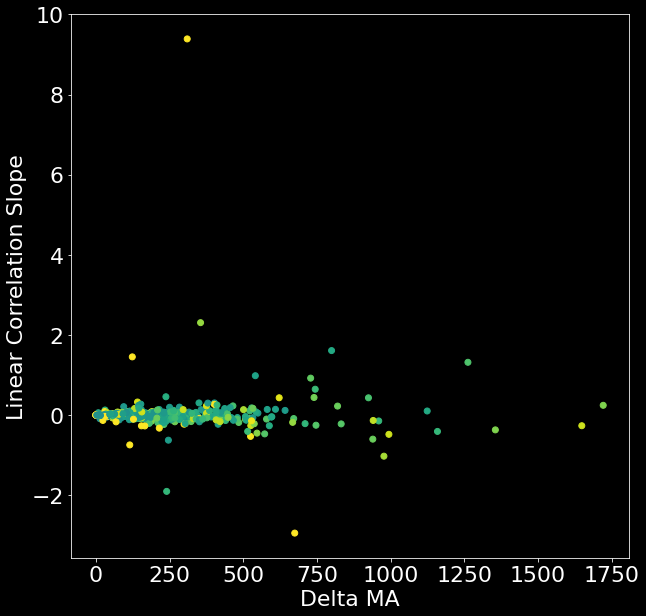

In [39]:
#Now assignees
plt.figure(figsize=(10,10))

plt.scatter(assignee_deltaMAs, assignee_slopes, c=assignee_rsqs, cmap="viridis")

plt.xlabel("Delta MA")
plt.ylabel("Linear Correlation Slope")

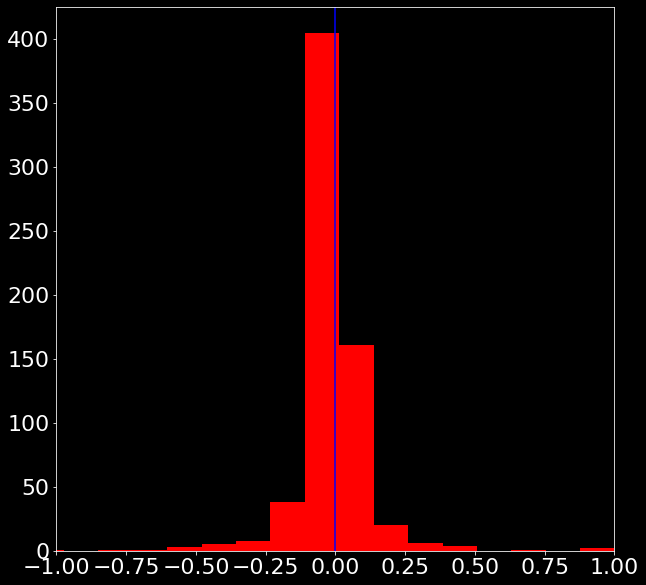

In [41]:
plt.figure(figsize=(10,10))

#Histogram of the number of various slopes
plt.hist(assignee_slopes, color="red", bins=100)

plt.axvline(0, color="blue")

plt.xlim(-1,1)

plt.show()